In [546]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import os

In [505]:
HEIGHT = 137
WIDTH = 236
SIZE = 64

In [557]:
df.iloc[:,0:SIZE**2+2]

,image_id,0,1,2,3,4,5,6,7,8,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,252,250,249,236,176,87,41,47,61
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,255
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,254,253,253,253,253,253,251,250,251
3,Train_3,247,247,249,253,253,252,251,251,250,...,221,241,247,250,248,247,247,250,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50205,Train_50205,247,250,250,250,252,250,250,250,251,...,254,253,252,251,252,253,254,255,255,255
50206,Train_50206,250,251,250,244,245,243,246,248,246,...,255,255,255,255,255,255,255,255,255,255
50207,Train_50207,246,245,246,246,245,245,247,247,245,...,246,247,248,248,248,249,249,248,246,246
50208,Train_50208,246,242,240,244,247,242,239,241,245,...,246,246,246,247,247,247,248,247,247,247


In [615]:
root = '../parquet'

for file in os.listdir(root):
    path=os.path.join(root, file)
    if file == 'cropped':
        continue
    print(file)
    df = pd.read_parquet(path, 'fastparquet')
    
    N_images = len(df)
    
    images = np.zeros((N_images, SIZE**2))
    for idx in range(N_images):
        img = series_to_img_reshape(df.iloc[idx, 1:])
        img_binary = img_to_binary(img)
        img_crop = crop_symbol(img_binary)
        resized = cv2.resize(crop_img, (SIZE, SIZE), interpolation = cv2.INTER_AREA)
        try:
            images[idx, :] = resized.flatten()
        except cv2.error:
            images[idx, :] = np.ones(SIZE**2)
            print(f'Error as index {idx}')

    df_to_write = pd.DataFrame(images, columns=[str(i) for i in range(SIZE**2)])
    if 'test' in file:
        file_type = 'Test'
    else:
        file_type = 'Train'
        
    df_to_write.insert(0, 'image_id', [file_type+'_'+str(i) for i in range(len(df_to_write))])

    df_to_write.to_parquet(os.path.join(*[root,'cropped', file]), engine='fastparquet')


test_image_data_0.parquet
0
test_image_data_1.parquet
0
test_image_data_2.parquet
0
test_image_data_3.parquet
0
train_image_data_0.parquet
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
train_image_data_1.parquet
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500


array([1., 1., 1., 1., 1.])

In [616]:
df = pd.read_parquet('../parquet/cropped/train_image_data_0.parquet', 'fastparquet')

In [617]:
df.head()

,image_id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,Train_0,255.0,255.000002,255.000004,255.000004,255.000002,255.0,255.0,255.000002,255.0,...,255.000004,255.0,255.000002,255.0,255.0,255.000002,255.000004,255.000004,255.000002,255.0
1,Train_1,255.0,255.000002,255.000004,255.000004,255.000002,255.0,255.0,255.000002,255.0,...,255.000004,255.0,255.000002,255.0,255.0,255.000002,255.000004,255.000004,255.000002,255.0
2,Train_2,255.0,255.000002,255.000004,255.000004,255.000002,255.0,255.0,255.000002,255.0,...,255.000004,255.0,255.000002,255.0,255.0,255.000002,255.000004,255.000004,255.000002,255.0
3,Train_3,255.0,255.000002,255.000004,255.000004,255.000002,255.0,255.0,255.000002,255.0,...,255.000004,255.0,255.000002,255.0,255.0,255.000002,255.000004,255.000004,255.000002,255.0
4,Train_4,255.0,255.000002,255.000004,255.000004,255.000002,255.0,255.0,255.000002,255.0,...,255.000004,255.0,255.000002,255.0,255.0,255.000002,255.000004,255.000004,255.000002,255.0


In [506]:
def series_to_img_reshape(df_row, height = 137, width = 236):
    '''
    DOCS
    Takes an pandas series
    
    returns numpy array
    '''
    
    return np.resize(df_row.to_numpy(), (height, width)).astype(int)

def img_to_binary(img, threshold=200):
    '''
    DOCS
    '''
    img[img>threshold] = 255
    img[img<=threshold] = 0
    return img

def bbox(img, padding=10):
    '''
        DOCS
    '''
    
    horizontal_where = np.any(img == 0, axis=1)
    y0 = np.searchsorted(horizontal_where, True)
    y1 = y0 + sum(horizontal_where)
    
    vertical_where = np.any(img == 0, axis=0)
    x0 = np.searchsorted(vertical_where, True)
    x1 = x0 + sum(vertical_where)

    return x0, y0, x1-x0, y1-y0 

def crop_symbol(img, pad=5):
    '''
    DOCS
    '''
    horizontal_where = np.any(img == 0, axis=1)
    x0 = np.searchsorted(horizontal_where, True)
    x1 = x0 + sum(horizontal_where)
    
    vertical_where = np.any(img == 0, axis=0)
    y0 = np.searchsorted(vertical_where, True)
    y1 = y0 + sum(vertical_where)
    
    img_crop = img[x0:x1, y0:y1]
    x, y = img_crop.shape
    
    
    # This could be simplified, but good for now
    if x < y:
        padding_y = np.ones((pad, np.size(img_crop, axis=1)))*255
        while x < y:
            img_crop = np.vstack((padding_y ,img_crop, padding_y))
            x, y = img_crop.shape
            
        padding_x = np.ones((np.size(img_crop, axis=0), pad))*255
        img_crop = np.hstack((padding_x, img_crop, padding_x))
        
    else:
        padding_x = np.ones((np.size(img_crop, axis=0), pad))*255
        while x > y:
            img_crop = np.hstack((padding_x ,img_crop, padding_x))
            x, y = img_crop.shape
            
        padding_y = np.ones((pad, np.size(img_crop, axis=1)))*255
        img_crop = np.vstack((padding_y, img_crop, padding_y))
        
    return img_crop

In [620]:
img = series_to_img_reshape(df.iloc[200,1:], height=SIZE, width=SIZE)
#img = np.resize(df.iloc[2,1:].to_numpy(), (137,236)).astype('float32')

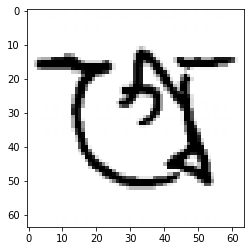

In [621]:
plt.imshow(img, 'gray')

In [622]:
img=img_to_binary(img)

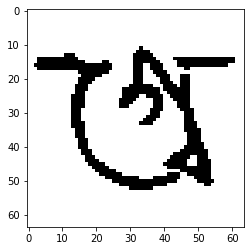

In [623]:
plt.imshow(img, 'gray')

In [624]:
crop_img = crop_symbol(img)

In [625]:
x, y = crop_img.shape

In [626]:
x/y

0.8985507246376812

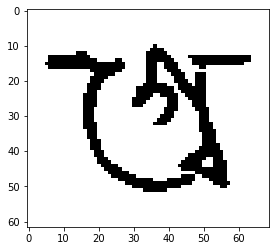

In [627]:
plt.imshow(crop_img, 'gray')

In [544]:
resized = cv2.resize(crop_img, (SIZE, SIZE), interpolation = cv2.INTER_AREA)

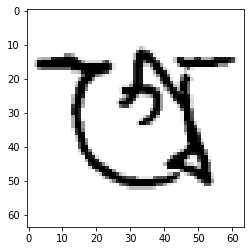

In [545]:
plt.imshow(resized, 'gray')

# Exploration

In [202]:
vertical_where = np.any(img == 0, axis=1)
top = np.searchsorted(vertical_where, True)
bottom = top + sum(vertical_where)

In [203]:
print(bottom, top)

123 0


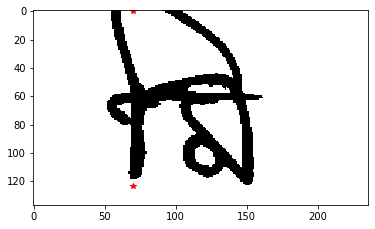

In [204]:
plt.imshow(img, 'gray')
plt.plot(70, top, 'r*')
plt.plot(70, bottom, 'r*')

In [205]:
horizontal_where = np.any(img == 0, axis=0)
left = np.searchsorted(horizontal_where, True)
right = left + sum(horizontal_where)
print(right, left)

162 52


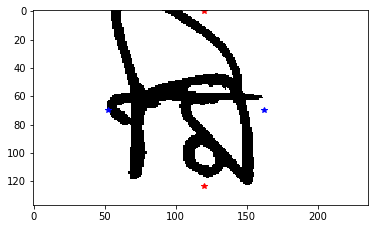

In [206]:
plt.imshow(img, 'gray')
plt.plot(120, top, 'r*')
plt.plot(120, bottom, 'r*')
plt.plot(left, 70, 'b*')
plt.plot(right, 70, 'b*')
plt.show()

In [255]:
bbox = bbox(img)
crop_img = crop_symbol(img)

In [346]:
img_cropped = crop_symbol(img)

(10, 130)
(123, 130)


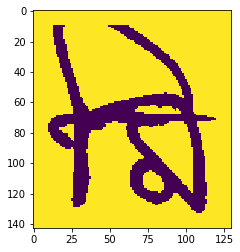

In [347]:
plt.imshow(img_cropped)

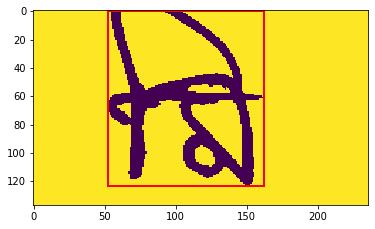

In [209]:
fig, ax = plt.subplots()
ax.imshow(img)
rect = Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2, edgecolor='r',facecolor='none')
ax.add_patch(rect)

In [231]:
framed = img[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]

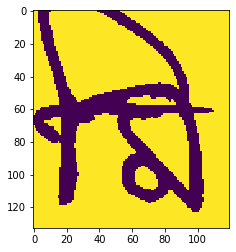

In [232]:
plt.imshow(framed)

In [348]:
resized = cv2.resize(img_cropped, 
                     (SIZE, SIZE), interpolation = cv2.INTER_AREA)

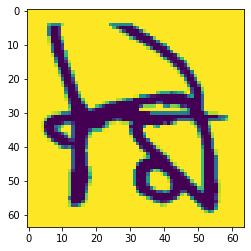

In [349]:
plt.imshow(resized)